# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<ul>
<li>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.</li>
<li>There are some odd characters in the ‘cast’ column.</li>
<li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

#### From this dataset we could try to solve many different questions such as :
<ol>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>Who are the actors that have participated in more movies?</li>
<li>What is the most 10 popular genres all over the time?</li>
<li>Is there a relation between a movie runtime and the vote average?</li>
<li>Is there an improvement in the quality of movies from year to year?</li>
<li>Who are the top 5 directors according to high revenues?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>Is the number of movies increase from year to year?</li>  
</ol>

#### For the analysis included in the notebook I have chosen to look at the following 6 questions :
<ol>
<li>What is the most 10 popular genres all over the time?</li>
<li>Is there a relation between a movie runtime and the vote average?</li>
<li>Is there an improvement in the quality of movies from year to year?</li>
<li>Who are the top 5 directors according to high revenues?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>Is the number of movies increase from year to year?</li> 
</ol>

In [1]:
#Importing the essential libraries for our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

1- load the data

2- check the data shape (10866 rows and 21 columns)

3- check the presence of null values ( Missing Values )

4- check the presence of duplications

5- check the presence of outliers

### General Properties

In [2]:
#Load our data in  a dataframe

df = pd.read_csv('tmdb-movies.csv')

In [3]:
#print out the first  rows of our data

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Check the shape of our data (rows , columns)

df.shape

(10866, 21)

In [5]:
#Show an overview about the data

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Check how many NaN values in our data

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Check how many duplicated rows in our data

df.duplicated().sum()

1

### Data Cleaning 

1- Drop the unneeded columns
> We don't need it in our analysis or it has a many null values

2- Drop the duplicates

3- Drop any row with NaN values ( Missing Values)
> After the previous two steps I have checked the presence of NaN values and decided to drop them since that only two columns ( director , genres ) have NaN values --> In the worst case 44 + 23 = 67 rows ( Small number if compared with the shape of the whole data ) and the data in these two columns are names and categories ( Categorical Data ) so I can't replace these NaN values with an appropriate value

4- Dealing with the numeric outliers in these four columns ( budget , revenue , budget_adj , revenue_adj )
> Since that 50% of the data in these four columns are zeroes, So I decided to replace all these zeroes with the Average of each column instead of droping the rows with zeroes in these columns 

### After these steps the data is ready for our analysis

In [8]:
#State the name of columns which we need to remove from our data

dropped_cols = ['id','imdb_id','original_title','cast','homepage','tagline','keywords','overview','release_date','production_companies']

In [9]:
#Drop the columns stated in the dropped_cols list

df.drop(dropped_cols,axis=1,inplace=True)

In [10]:
#print out the first  rows of our data

df.head()

,popularity,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
#Drop the duplicated rows

df.drop_duplicates(inplace=True)

In [12]:
#Check the shape of our data (rows , columns)

df.shape

(10865, 11)

In [13]:
#Check how many NaN values in the data after the previous cleaning

df.isnull().sum()

popularity       0
budget           0
revenue          0
director        44
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [14]:
#Drop the rows that have NaN values 

df.dropna(inplace=True)

In [15]:
#Check how many NaN values in the data after the previous cleaning

df.isnull().sum()

popularity      0
budget          0
revenue         0
director        0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [16]:
#Check the shape of our data (rows , columns)

df.shape

(10800, 11)

In [17]:
#print out the first  rows of our data

df.head()

,popularity,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
#Make the condition of zero outliers

zero_outliers = (df['revenue_adj'] == 0) & (df['budget_adj'] == 0) 

In [19]:
#Apply the condition on the data and get the shape of this data (about 50% of data in these columns are zeroes)

df[zero_outliers].shape

(4641, 11)

In [20]:
#This function takes the column names and the the value to be replaced and replace it with the mean of th column

def replace_mean_inplace(cols_name,rep):
    for col in cols_name:
        df[col].replace(rep,df[col].mean(),inplace=True)

In [21]:
#Apply the function on the following columns 

replace_mean_inplace(['revenue_adj','budget_adj','revenue','budget'],0)

In [22]:
#Show an overview about the data

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,2.238817e+07,6.214616e+07,102.189722,218.600741,5.970880,2001.289537,2.686734e+07,8.015698e+07
std,1.002441,2.807649e+07,1.113169e+08,30.783873,577.165055,0.933006,12.819545,3.057304e+07,1.369205e+08
min,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209157,1.471114e+07,4.006558e+07,90.000000,17.000000,5.400000,1995.000000,1.765437e+07,5.167714e+07
50%,0.385471,1.471114e+07,4.006558e+07,99.000000,39.000000,6.000000,2006.000000,1.765437e+07,5.167714e+07
75%,0.717508,1.564374e+07,4.006558e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,5.167714e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

>  I have used the analysis step to answer these questions which I have asked in my own ( 6 Questions )  

### 1- What is the most 10 popular genres all over the time?

In [23]:
#Data to be plotted

data = df['genres'].value_counts()[:10]

In [24]:
#Determine the data of the X axis and the data of the X axis

x = data.index
y = data

<ipython-input-25-78ca59ba3534>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


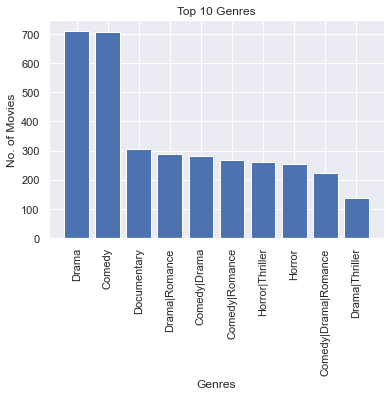

In [25]:
#Plotting

fig, ax = plt.subplots()

#set the plot and ticks properties
ax.set_xticklabels(x,rotation=90)
ax.set_title("Top 10 Genres")
ax.set_xlabel('Genres')
ax.set_ylabel('No. of Movies')

ax.bar(x, y);

### 2- Is there a relation between a movie runtime and the vote average?

In [26]:
#Data to be plotted

runtime_data = df['runtime']
mean_vote_data = df['vote_average']

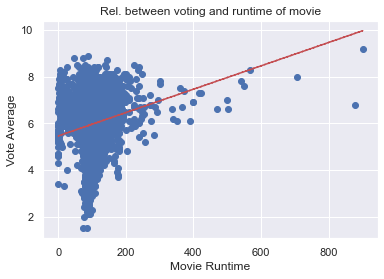

In [27]:
#Plotting

fig, ax = plt.subplots()

#set the plot properties
ax.set_title('Rel. between voting and runtime of movie')
ax.set_xlabel('Movie Runtime')
ax.set_ylabel('Vote Average')

ax.scatter(runtime_data, mean_vote_data);

#Plotting the trendline to show the correlation
z = np.polyfit(runtime_data, mean_vote_data, 1)
p = np.poly1d(z)
ax.plot(runtime_data,p(runtime_data),"r--");

### 3- Is there an improvement in the quality of movies from year to year?

In [28]:
#Data to be plotted

mean_vote_data = df.groupby('release_year')['vote_average'].mean()
mean_budget_data = df.groupby('release_year')['budget_adj'].mean()

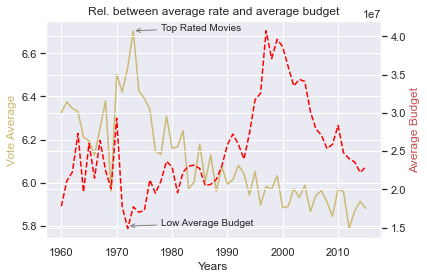

In [29]:
#Plotting

fig, ax = plt.subplots()

#Make a twin plot with shared x axis
ax2 = ax.twinx()

#set the plot properties
ax.set_xlabel('Years')
ax.set_ylabel('Vote Average',color='y')
ax2.set_ylabel('Average Budget',color='r')
ax.set_title('Rel. between average rate and average budget')

ax.annotate('Top Rated Movies',xy=(mean_vote_data.idxmax(),mean_vote_data.max()),xytext=(1978,mean_vote_data.max()),arrowprops={"arrowstyle":"->", "color":"gray"})
ax.annotate('Low Average Budget',xy=(mean_budget_data.idxmin(),5.8),xytext=(1978,5.8),arrowprops={"arrowstyle":"->", "color":"gray"})

ax2.plot(mean_budget_data.index, mean_budget_data,linestyle='--',color='red');
ax.plot(mean_vote_data.index, mean_vote_data,color='y');

### 4- Who are the top 5 directors according to high revenues?

In [30]:
#Data to be plotted

grouped_directors = df.groupby('director')['revenue_adj'].sum()
grouped_directors = grouped_directors.sort_values(ascending = False)[:5]
grouped_directors

director
Steven Spielberg    1.530580e+10
James Cameron       7.378898e+09
Peter Jackson       7.123202e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.759003e+09
Name: revenue_adj, dtype: float64

<ipython-input-31-41a816b63419>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped_directors.index,rotation=90)


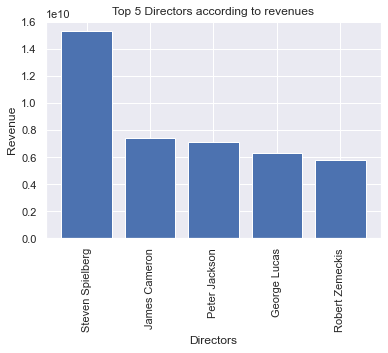

In [31]:
#Plotting

fig, ax = plt.subplots()

#set the plot and ticks properties
ax.set_xticklabels(grouped_directors.index,rotation=90)
ax.set_title("Top 5 Directors according to revenues")
ax.set_xlabel('Directors')
ax.set_ylabel('Revenue')

ax.bar(grouped_directors.index, grouped_directors);

### 5- What kinds of properties are associated with movies that have high revenues?

In [32]:
#Sorting the data by the revenue_adj column descendingly

df.sort_values(by='revenue_adj',ascending = False,inplace=True)

In [33]:
#print out the first  rows of our data

df.head()

,popularity,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000.0,2.781506e+09,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,11000000.0,7.753980e+08,George Lucas,121,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,200000000.0,1.845034e+09,James Cameron,194,Drama|Romance|Thriller,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,8000000.0,4.413061e+08,William Friedkin,122,Drama|Horror|Thriller,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,7000000.0,4.706540e+08,Steven Spielberg,124,Horror|Thriller|Adventure,1415,7.3,1975,2.836275e+07,1.907006e+09


In [34]:
#Show an overview about the data

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,2.238817e+07,6.214616e+07,102.189722,218.600741,5.970880,2001.289537,2.686734e+07,8.015698e+07
std,1.002441,2.807649e+07,1.113169e+08,30.783873,577.165055,0.933006,12.819545,3.057304e+07,1.369205e+08
min,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209157,1.471114e+07,4.006558e+07,90.000000,17.000000,5.400000,1995.000000,1.765437e+07,5.167714e+07
50%,0.385471,1.471114e+07,4.006558e+07,99.000000,39.000000,6.000000,2006.000000,1.765437e+07,5.167714e+07
75%,0.717508,1.564374e+07,4.006558e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,5.167714e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


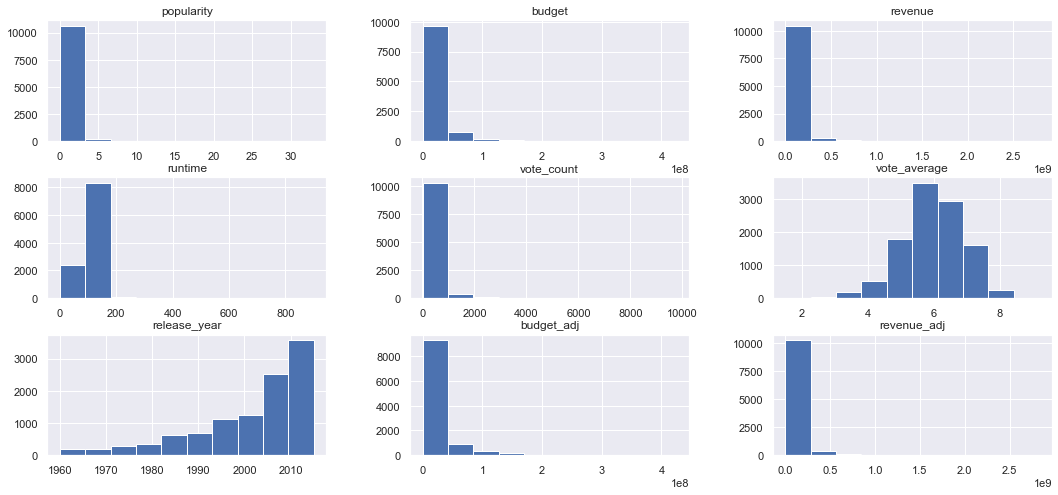

In [35]:
#Plotting a histogram for the columns in the data

df.hist(figsize = (18,8));

### 6- Is the number of movies increase from year to year?

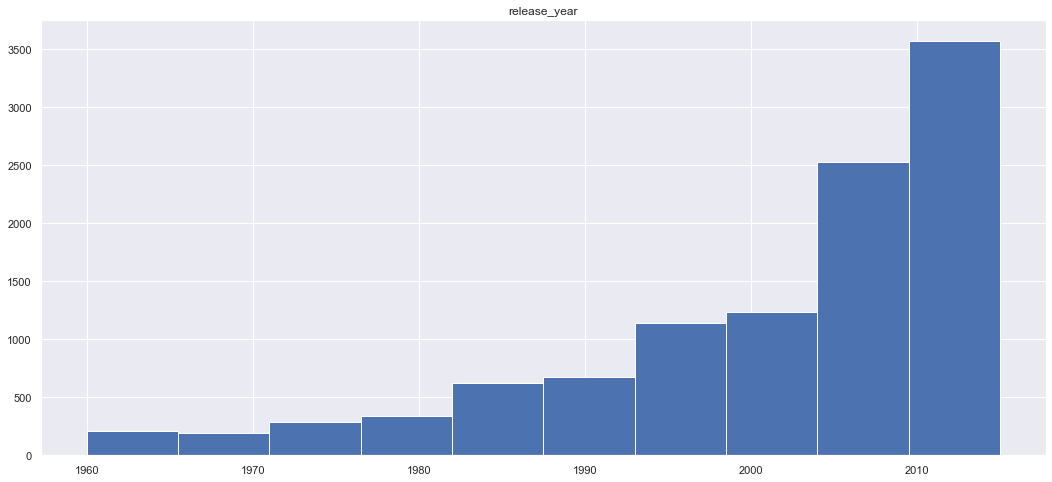

In [36]:
#Plotting a histogram for the relase year and no. of movies

df.hist(column='release_year',figsize = (18,8));

<a id='conclusions'></a>
## Conclusions
#### Results :
<ol>
<li>The most movie genres watched are Drama and Comedy</li>
<li>As the runtime of the movie increases the voting rate of the movie increases also ( positive correlation )</li>
<li>As the years go by, the budget of the movies increases but, In contrast the quality of the movies decreases</li>
<li>The most director according to revenue is Steven Spielberg</li>
<li>The Number of movies increases from year to year</li>
</ol>

#### Limitations :
<ol>
<li>This dataset has a lot of columns with outliers such as revenue column</li>
<li>This dataset has a great number of unique values in each columns</li>
<li>This datatset has a lot of unneeded colums which needs to be removed for this analysis</li>
<li>This datatset has a lot of missing values which need to decide what to do with it</li>
<li>The cast column and some other columns has strings and seperated with '|' character which limited our analysis until it not solved</li>
</ol>

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1